# Starter Classes

These are classes that will be used throughout the project. 

In [1]:
#All neccesary classes for project

#general
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as ss

#for preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.pipeline import FeatureUnion

#for machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
from sklearn.svm import SVR

#for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

#for utility packages
from Utilities.utilities import import_data
from Utilities.utilities import DataFrameSelector
from Utilities.utilities import CategoricalEncoder
from Utilities.utilities import display_scores
from Utilities.utilities import pipeline_transform

c:\users\sdgeo\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Import Data

Here we will import the data, view it, and scale it as well as impute missing values

In [55]:
raw_data = import_data("craig_rppa.csv", "C:/Users/sdgeo/Dropbox/Palbo RPPA/raw_data").drop('Rep', axis=1).drop('SAMPLE ID', axis=1)
raw_data_subsets = import_data("protein_list.csv", "C:/Users/sdgeo/Dropbox/Palbo RPPA/raw_data")
raw_data

,Cell line,Drug,Day,c-Abl Y245,Acetyl-CoA Carboxylase S79,AKT S473,AKT T308,ATM S1981,Axl Y702,BAD S112,...,Stat6 Y641,TAB2 S372,Tuberin/TSC2 Y1571,VASP S157,Vav3 Y173,VEGFR 2 Y1175,Zap-70 Y319/Syk Y352,p70 S6 Kinase,Vimentin,Rb Total
0,PANC-1,DMSO,1,11170.147520,11908.410910,6548.555058,11825.343470,11579.601650,4514.275383,13891.043480,...,9585.436758,26108.078760,18863.80465,6386.873094,21872.81959,13147.674870,4807.823122,18015.716350,26903.180940,17925.860540
1,PANC-1,P600,1,11956.136490,12444.075200,6136.440452,7295.408508,9837.926479,1605.194227,12670.092190,...,10363.033580,25336.475180,21418.28172,6033.001480,19225.64455,13095.180520,6093.635547,14443.504380,32859.613140,15336.632620
2,PANC-1,DMSO,3,15214.437850,13226.792300,5469.816515,9604.625423,12481.466710,7950.578296,13333.036010,...,10916.168700,25591.092440,21482.63861,6198.114122,17765.25473,14472.418200,6130.304600,15063.048210,25591.092440,15898.813880
3,PANC-1,P600,3,10157.827120,13108.287550,6348.663296,8038.514860,5497.234713,0.000045,13413.268870,...,8442.218143,18251.458520,16580.78217,5546.932160,14838.78355,11813.519260,5860.555313,12431.644170,22471.440210,12468.986440
4,PANC-1,DMSO,5,11908.410910,12544.031760,7700.190583,10117.279900,7037.443233,434.849420,14928.091630,...,8493.020023,25591.092440,19187.23447,6412.469890,16139.09922,13766.587410,5541.385760,14705.836250,21162.796520,14143.354700
5,PANC-1,P600,5,9614.229571,11766.362980,12357.271220,10157.827120,5218.683362,218.546779,12835.884940,...,8225.549183,24343.018710,16797.74771,6483.400546,16139.09922,12040.122680,6687.528219,13684.241140,26108.078760,11872.736140
6,PANC-1,DMSO,1,12283.354920,9072.470759,4138.133289,9818.271712,7324.646460,2552.937128,13588.786350,...,9730.296144,21525.643760,17997.71952,5491.738006,20353.32416,13521.010450,7465.145653,17119.957120,22026.465790,19015.309320
7,PANC-1,P600,1,12076.300420,11778.128760,7910.923716,8664.594374,7700.190583,5848.846764,14357.095370,...,11070.069180,28853.900370,21525.64376,6694.221799,20496.31617,14371.465460,6815.806400,17623.709890,28853.900370,17326.635640
8,PANC-1,DMSO,3,13373.098650,9442.724955,3068.672333,8751.668652,7692.491131,1627.824893,16647.249170,...,10016.608990,22925.382040,21547.16834,6235.411885,17836.45289,14530.419590,6815.806400,13643.246390,26903.180940,17068.669780
9,PANC-1,P600,3,10188.349000,14943.033230,6754.740541,6247.894282,5442.535068,1176.148236,14764.787200,...,8510.021827,19477.200490,17641.33272,6179.546041,15275.41305,13003.834740,6406.064145,12419.213720,23623.557560,12594.304720


In [74]:

#For doing DMSO vs P600
raw_data_P600 = raw_data.loc[raw_data["Drug"] != 'P600Wash'].reset_index().drop("index", axis=1)

#For doing P600 vs P600W
raw_data_P600W = raw_data.loc[raw_data["Drug"] != 'DMSO'].reset_index().drop("index", axis=1)
raw_data_P600W = raw_data_P600W.loc[raw_data_P600W["Day"] == 14].reset_index().drop("index", axis=1)

#For doing DMSO vs P600W
raw_data_DMSO_P600W = raw_data.loc[raw_data["Drug"] != 'P600'].reset_index().drop("index", axis=1)
raw_data_P600

,Cell line,Drug,Day,c-Abl Y245,Acetyl-CoA Carboxylase S79,AKT S473,AKT T308,ATM S1981,Axl Y702,BAD S112,...,Stat6 Y641,TAB2 S372,Tuberin/TSC2 Y1571,VASP S157,Vav3 Y173,VEGFR 2 Y1175,Zap-70 Y319/Syk Y352,p70 S6 Kinase,Vimentin,Rb Total
0,PANC-1,DMSO,1,11170.147520,11908.410910,6548.555058,11825.343470,11579.601650,4514.275383,13891.043480,...,9585.436758,26108.078760,18863.80465,6386.873094,21872.81959,13147.674870,4807.823122,18015.716350,26903.180940,17925.860540
1,PANC-1,P600,1,11956.136490,12444.075200,6136.440452,7295.408508,9837.926479,1605.194227,12670.092190,...,10363.033580,25336.475180,21418.28172,6033.001480,19225.64455,13095.180520,6093.635547,14443.504380,32859.613140,15336.632620
2,PANC-1,DMSO,3,15214.437850,13226.792300,5469.816515,9604.625423,12481.466710,7950.578296,13333.036010,...,10916.168700,25591.092440,21482.63861,6198.114122,17765.25473,14472.418200,6130.304600,15063.048210,25591.092440,15898.813880
3,PANC-1,P600,3,10157.827120,13108.287550,6348.663296,8038.514860,5497.234713,0.000045,13413.268870,...,8442.218143,18251.458520,16580.78217,5546.932160,14838.78355,11813.519260,5860.555313,12431.644170,22471.440210,12468.986440
4,PANC-1,DMSO,5,11908.410910,12544.031760,7700.190583,10117.279900,7037.443233,434.849420,14928.091630,...,8493.020023,25591.092440,19187.23447,6412.469890,16139.09922,13766.587410,5541.385760,14705.836250,21162.796520,14143.354700
5,PANC-1,P600,5,9614.229571,11766.362980,12357.271220,10157.827120,5218.683362,218.546779,12835.884940,...,8225.549183,24343.018710,16797.74771,6483.400546,16139.09922,12040.122680,6687.528219,13684.241140,26108.078760,11872.736140
6,PANC-1,DMSO,1,12283.354920,9072.470759,4138.133289,9818.271712,7324.646460,2552.937128,13588.786350,...,9730.296144,21525.643760,17997.71952,5491.738006,20353.32416,13521.010450,7465.145653,17119.957120,22026.465790,19015.309320
7,PANC-1,P600,1,12076.300420,11778.128760,7910.923716,8664.594374,7700.190583,5848.846764,14357.095370,...,11070.069180,28853.900370,21525.64376,6694.221799,20496.31617,14371.465460,6815.806400,17623.709890,28853.900370,17326.635640
8,PANC-1,DMSO,3,13373.098650,9442.724955,3068.672333,8751.668652,7692.491131,1627.824893,16647.249170,...,10016.608990,22925.382040,21547.16834,6235.411885,17836.45289,14530.419590,6815.806400,13643.246390,26903.180940,17068.669780
9,PANC-1,P600,3,10188.349000,14943.033230,6754.740541,6247.894282,5442.535068,1176.148236,14764.787200,...,8510.021827,19477.200490,17641.33272,6179.546041,15275.41305,13003.834740,6406.064145,12419.213720,23623.557560,12594.304720


In [67]:
# Transform Data to proper scale 

#Isolate attributes based on numbers or objects
cleaned_data = pipeline_transform(raw_data_P600W).drop("Day", axis=1)
cleaned_data

,c-Abl Y245,Acetyl-CoA Carboxylase S79,AKT S473,AKT T308,ATM S1981,Axl Y702,BAD S112,Caspase 9 cleaved D315,Caspase 9 cleaved D330,Cofillin S3,...,Zap-70 Y319/Syk Y352,p70 S6 Kinase,Vimentin,Rb Total,MIA PaCa-2,PANC-1,Pa02C,Pa16C,P600,P600Wash
0,11908.41091,3381.248856,8291.612689,14574.08008,8111.194344,206.231639,11237.364990,6039.039941,18033.74837,19457.743720,...,8937.396198,12332.583160,21938.542270,13684.241140,1.0,0.0,0.0,0.0,1.0,0.0
1,11282.41196,3522.759171,8484.527817,15214.43785,8476.052186,1562.433923,11014.855720,7910.923716,18196.78147,31257.054740,...,6918.816498,12052.173700,17000.536400,12136.834520,1.0,0.0,0.0,0.0,1.0,0.0
2,11920.31873,3251.916823,8038.514860,13766.58741,8217.324422,1382.985537,11556.456250,6444.613267,18620.15320,31888.473320,...,6849.971555,11081.138700,15093.202270,10850.862150,1.0,0.0,0.0,0.0,1.0,0.0
3,10383.77889,3177.977063,4736.246851,10861.72283,9099.731399,1394.093652,8673.258538,4831.922988,12964.89069,13082.099070,...,5458.883399,6863.684213,6627.611662,9808.454381,1.0,0.0,0.0,0.0,1.0,0.0
4,11070.06918,6142.576587,74607.794680,30638.10957,8283.329771,251.891844,18379.666370,8111.194344,17430.90038,119371.956300,...,7593.139488,8673.258538,4015.834040,11521.846830,0.0,1.0,0.0,0.0,1.0,0.0
5,11956.13649,6898.089362,70969.116060,31571.17048,10352.671540,2445.488178,19322.015700,9966.649803,19830.97638,120571.692000,...,6093.635547,8875.053152,4890.255769,12369.639670,0.0,1.0,0.0,0.0,1.0,0.0
6,10383.77889,8299.911805,102744.434100,22471.44021,9181.997018,1484.747456,19555.259650,8742.926161,17000.53640,112420.334800,...,5872.292902,8349.857343,3601.119793,11556.456250,0.0,1.0,0.0,0.0,1.0,0.0
7,11896.50364,5738.767431,76879.919760,26370.47535,11591.180680,3936.313396,14200.037300,8690.621154,18996.31395,91126.148820,...,6002.911072,5744.511392,2835.574410,12369.639670,0.0,1.0,0.0,0.0,1.0,0.0
8,13480.50470,9701.155733,31888.473320,10519.64436,7816.559290,2361.376990,65512.756120,10551.253420,21938.54227,17872.175950,...,9537.628101,11203.711190,1573.409282,12052.173700,0.0,0.0,1.0,0.0,1.0,0.0
9,13807.95276,11192.508550,31888.473320,12874.45375,12076.300420,5658.984816,66836.168440,12258.802840,29143.86577,17188.569110,...,9145.345039,11036.905870,1298.545601,11837.168230,0.0,0.0,1.0,0.0,1.0,0.0


# Ready for Plotting and Graphing

Here you can use can visualize data and do any number of correlation matricies etc. 

Cleaned data item:
cleaned_data

In [68]:
cleaned_data.to_csv('cleaned_rppa_craig_P600W_Only.csv', sep=',')
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Columns: 158 entries, c-Abl Y245 to P600Wash
dtypes: float64(158)
memory usage: 39.6 KB


In [69]:
cleaned_data.describe()

,c-Abl Y245,Acetyl-CoA Carboxylase S79,AKT S473,AKT T308,ATM S1981,Axl Y702,BAD S112,Caspase 9 cleaved D315,Caspase 9 cleaved D330,Cofillin S3,...,Zap-70 Y319/Syk Y352,p70 S6 Kinase,Vimentin,Rb Total,MIA PaCa-2,PANC-1,Pa02C,Pa16C,P600,P600Wash
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,13626.173006,10480.490678,27005.064106,15788.809463,10348.613489,5635.372546,21244.019781,10949.698151,21678.510815,25615.275556,...,7134.499801,11297.265733,7826.347054,10424.550708,0.250000,0.250000,0.250000,0.250000,0.500000,0.500000
std,3579.870814,11382.314783,25689.390108,5210.488043,2168.072330,3282.298577,16500.357362,3913.213396,4968.052218,36137.231643,...,1459.423941,3707.328891,8669.712997,2195.842130,0.439941,0.439941,0.439941,0.439941,0.508001,0.508001
min,10198.536840,2109.064589,4345.950865,10519.644360,6877.430879,206.231639,8673.258538,4831.922988,12964.890690,0.000045,...,4416.044430,5744.511392,1004.253923,6323.321197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11125.559400,3597.782207,9104.718297,12766.859113,8846.396924,2465.775118,11226.150880,8669.004432,17957.751852,1762.574415,...,5979.090805,8848.589013,1292.754383,8896.904395,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11968.103720,5520.810102,16647.457275,14329.285685,9447.450590,6238.607676,18279.126405,9764.446870,20569.302770,10662.057309,...,6936.157251,10861.766530,2204.491846,10764.488790,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
75%,15531.663903,10783.108218,33971.274673,17077.983385,11696.136685,8054.802553,20005.265387,12534.033837,25913.239530,33365.746242,...,8514.280787,12277.247920,16198.114858,11971.179550,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000
max,22471.440210,43477.563620,102744.434100,31571.170480,14735.275220,12222.090030,66836.168440,22247.840550,33189.865340,120571.692000,...,10097.067020,21916.605830,26370.475350,14314.098560,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


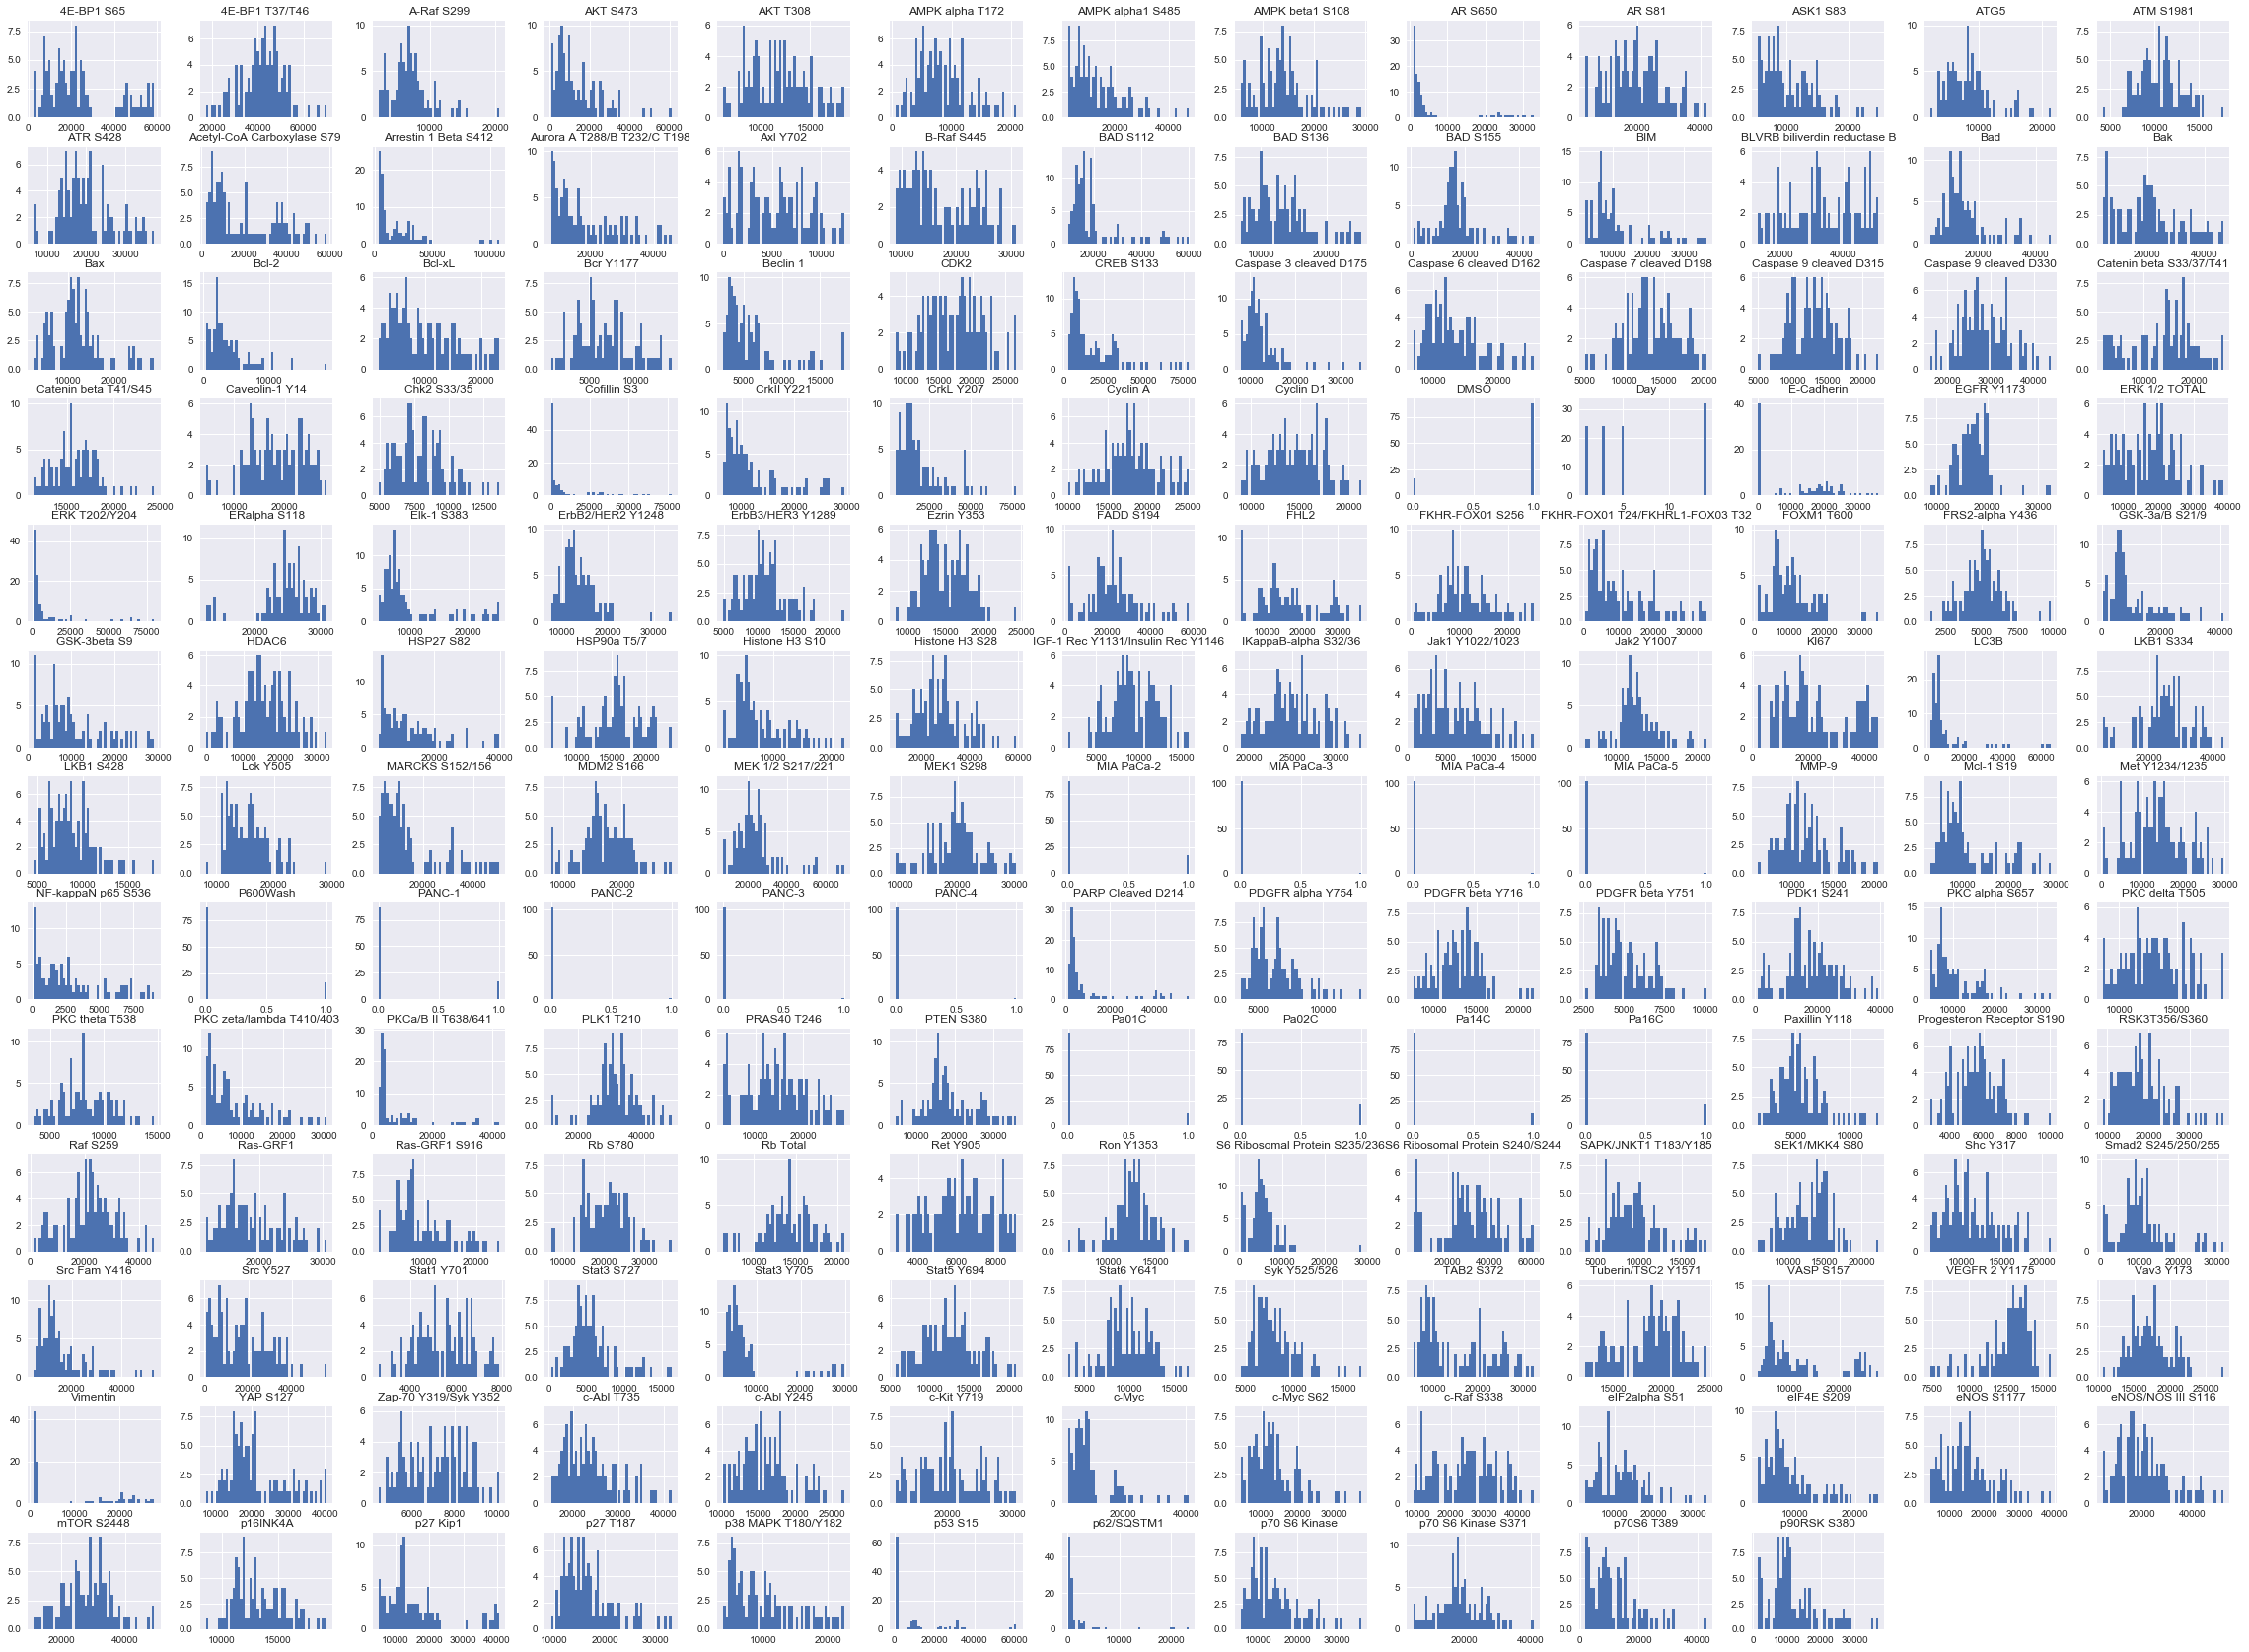

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
cleaned_data.reindex(sorted(cleaned_data.columns), axis=1)
cleaned_data.hist(bins=50, figsize=(40,30))
plt.show()

In [70]:
corr_matrix = cleaned_data.corr()

In [71]:
corr_matrix_spear = cleaned_data.corr(method='spearman')
corr_matrix_spear.reindex(sorted(corr_matrix_spear.columns), axis=1)
pvalue_matrix_spear = pd.DataFrame(ss.spearmanr(cleaned_data).pvalue)



In [72]:
sns.set()

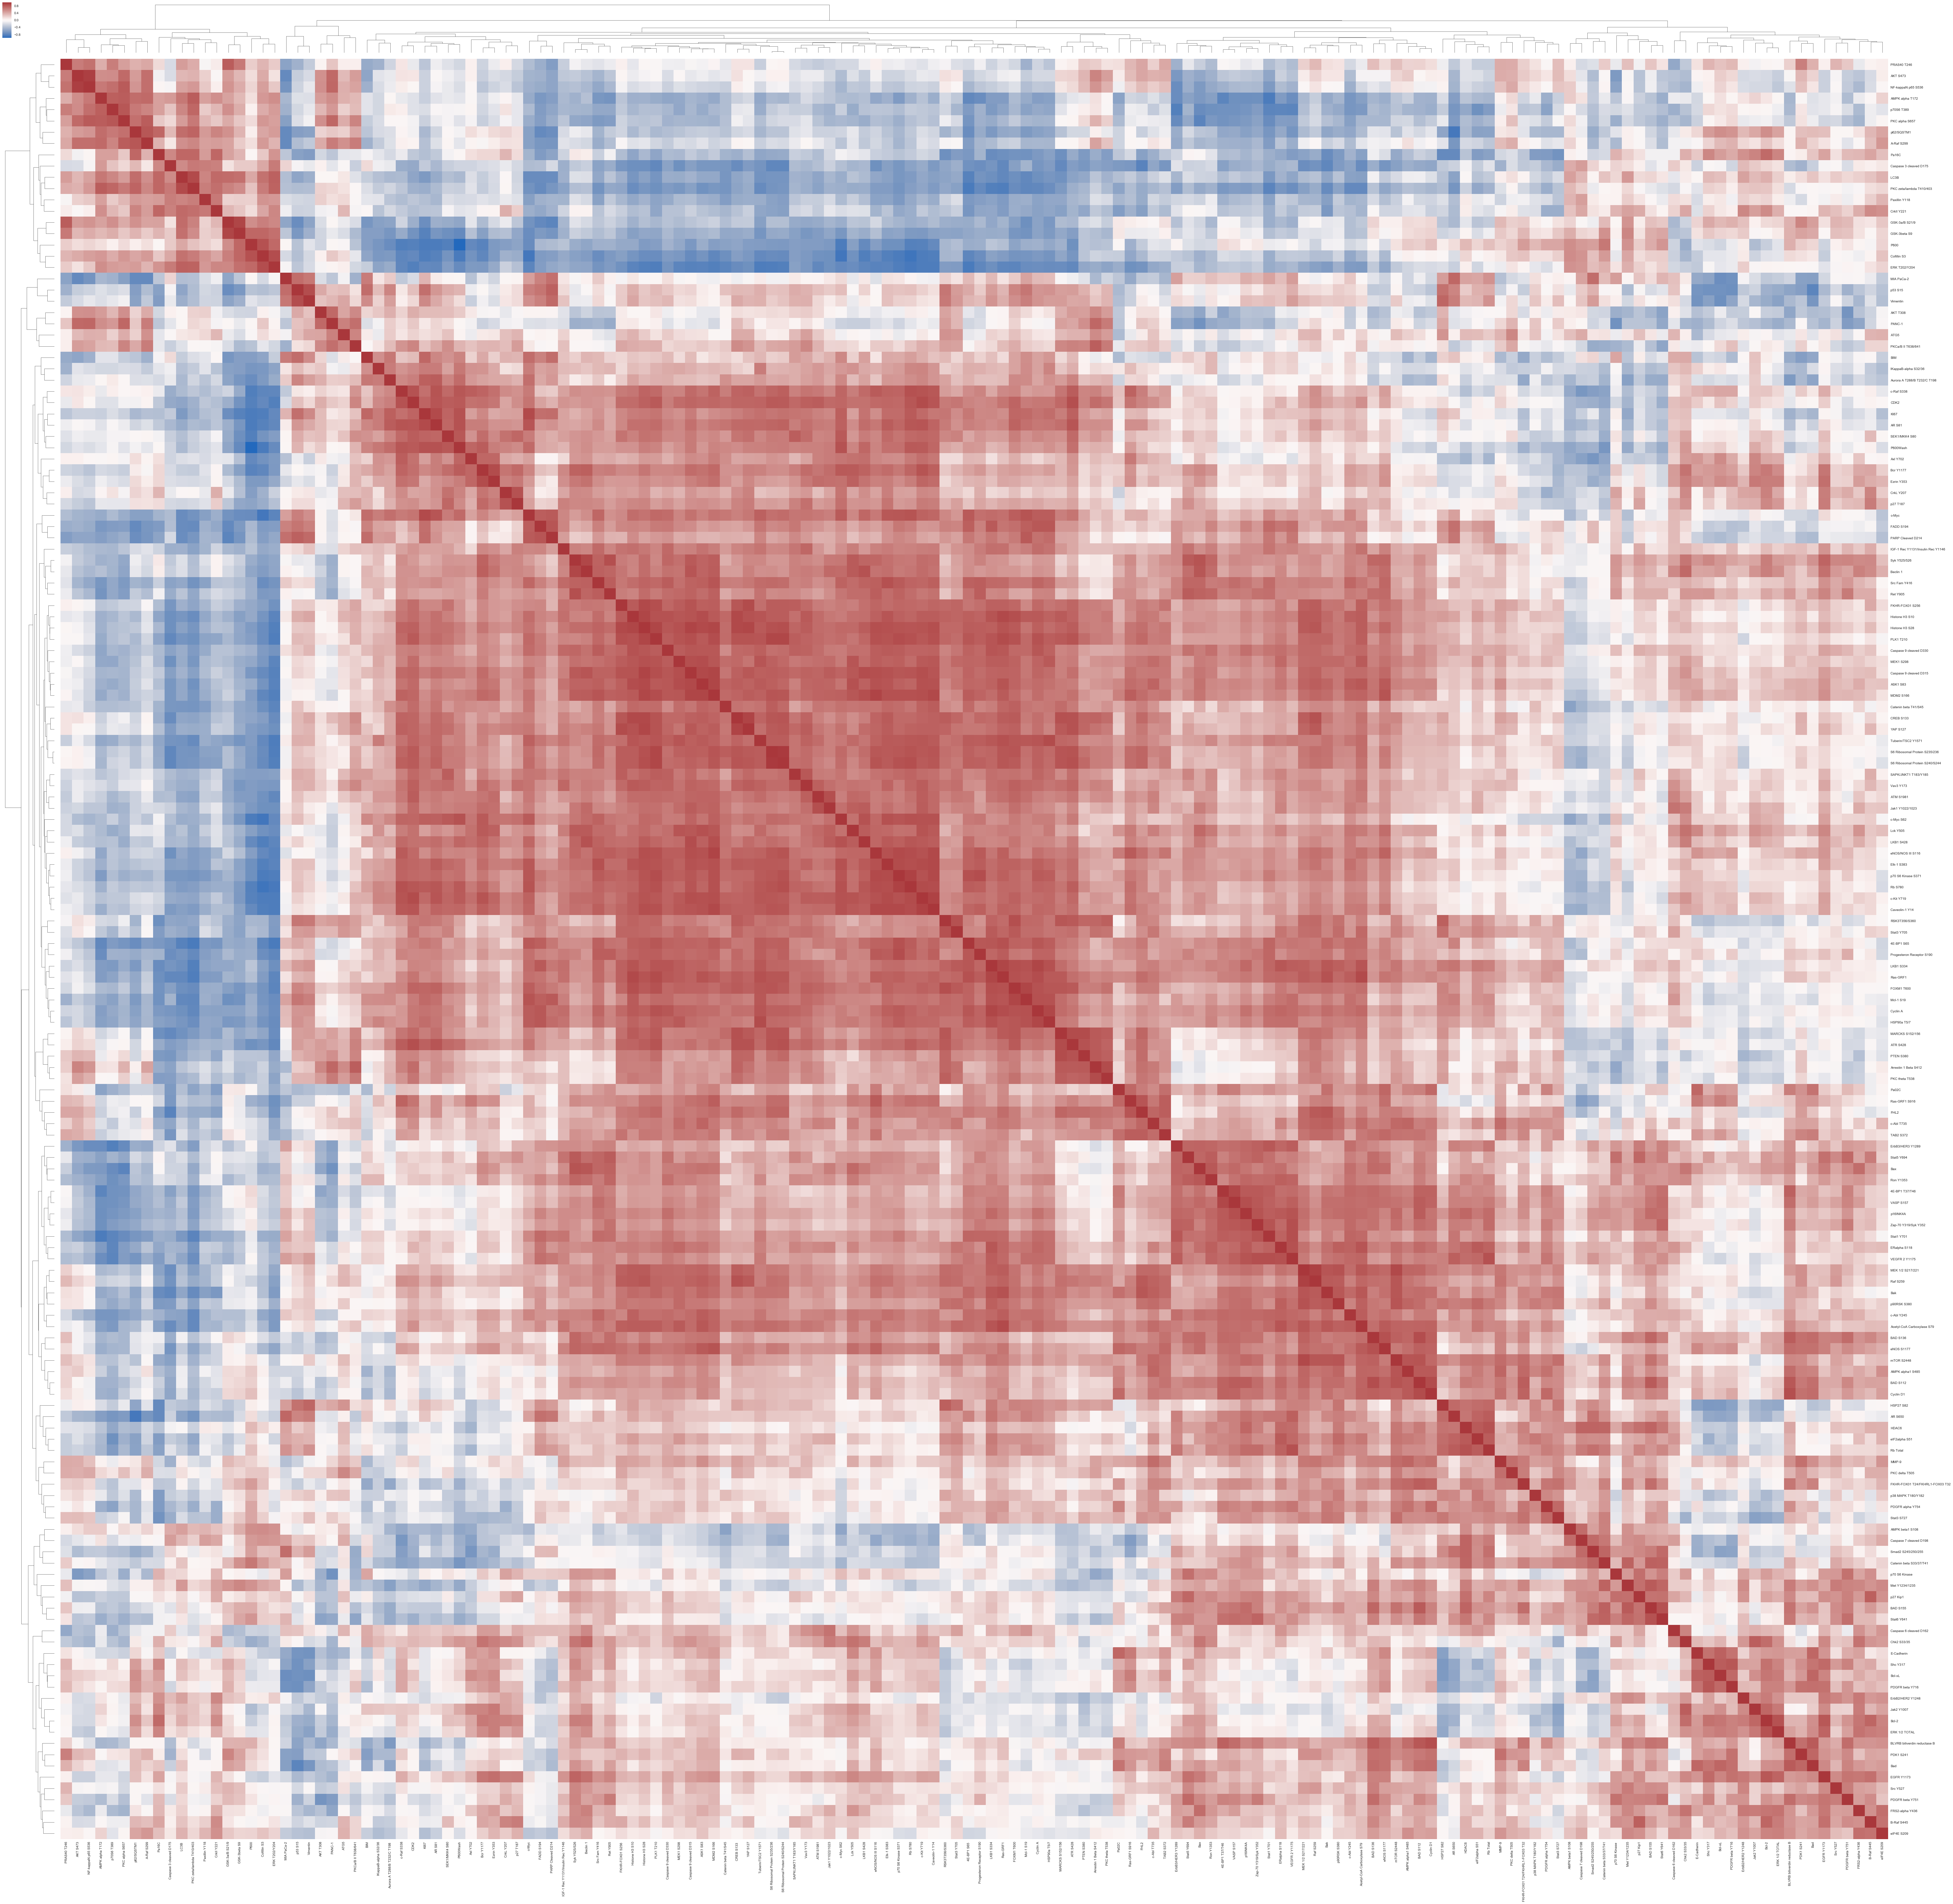

In [73]:

#color pallete used for all heatmaps
pls = sns.husl_palette(8, s=.45)

#overall cluster map
dims = (100, 100)
sns_whole = sns.clustermap(corr_matrix_spear, figsize=dims, cmap="vlag")
sns_whole.savefig("craig_whole_14_P600W.png", dpi = 'figure')

In [61]:
raw_data_subsets

,MAPK.AKT,RTKs,apoptosis,cell.cycle,cytoskeleton,dna,metabolism,core
0,PKC.alpha.S657,AKT.S473,AKT.S473,ATM.S1981,c.Abl.Y245,CREB.S133,Acetyl.CoA.S79,ERK.1.2.T202.Y204
1,X4E.BP1.S65,AKT.T308,AKT.T308,c.Abl.Y245,Cofilin.S3,CrkL.Y207,FKHR.FOX01.T24.FKHRL1.FOX03.T32,ERK.1.2.TOTAL
2,AKT.S473,ATM.S1981,ATM.S1981,Chk.1.S345,eNOS.NOSIII.S116,HDAC6,FKHR.FOX01.S256,p90RSK.S380
3,AKT.T308,c.Abl.Y245,BAD.S112,CDK2,Src.Fam.Y416,Histone.H3.S10,FKHRL1.FOX03.S253,RSK3.T356.360
4,ASK1.S83,ErbB2.HER2.Y1248,c.Abl.Y245,Smad2.S465.467,Src.Y527,Histone.H3.S28,FOXM1.T600,c.Myc.S62
5,Arrestin.1.beta.S412,ERK.1.2.T202.Y204,Cleaved.Caspase.9.D315,Smad2.S245.250.255,c.Abl.T735,c.Myc.S62,Beclin.1,c.Myc
6,B.Raf.S445,CDK2,Cleaved.Caspase.9.D330,c.Abl.T735,Bcr.Y1177,c.Myc,p62.SQSTM1,MEK1.S298
7,Bcr.Y1177,SAPK.JNK.T183.Y185,ERK.1.2.T202.Y204,p16.INK4a,Catenin.beta.S33.37.T41,Smad2.S465.467,Biliverdin.Reductase.B,MEK.1.2.S217.S221
8,CREB.S133,SEK1.MKK4.S80,FADD.S194,PLK1.T210,Catenin.B.T41.S45,Smad2.S245.250.255,AMPKalpha.T172,AKT.S473
9,CrKII.Y221,Src.Fam.Y416,FKHR.FOX01.T24.FKHRL1.FOX03.T32,KI67,Caveolin.1.Y14,YAP.S127,AMPKalpha1.S485,AKT.T308


In [219]:
vector_Core = raw_data_subsets["core"].dropna().reindex()

vector_MAPK = raw_data_subsets["MAPK.AKT"].dropna().reindex()
vector_MAPK = set(list(vector_MAPK) + list(vector_Core))
vector_MAPK = pd.DataFrame(list(vector_MAPK))
vector_MAPK = vector_MAPK[0]

vector_RTK = raw_data_subsets["RTKs"].dropna().reindex()
vector_RTK =  set(list(vector_RTK) + list(vector_Core))
vector_RTK = pd.DataFrame(list(vector_RTK))
vector_RTK = vector_RTK[0]

vector_Apoptosis = raw_data_subsets["apoptosis"].dropna().reindex()
vector_Apoptosis = set(list(vector_Apoptosis) + list(vector_Core))
vector_Apoptosis = pd.DataFrame(list(vector_Apoptosis))
vector_Apoptosis = vector_Apoptosis[0]

vector_Cell = raw_data_subsets["cell.cycle"].dropna().reindex()
vector_Cell = set(list(vector_Cell) + list(vector_Core))
vector_Cell = pd.DataFrame(list(vector_Cell))
vector_Cell = vector_Cell[0]

vector_Cytoskeleton = raw_data_subsets["cytoskeleton"].dropna().reindex()
vector_Cytoskeleton = set(list(vector_Cytoskeleton) + list(vector_Core))
vector_Cytoskeleton = pd.DataFrame(list(vector_Cytoskeleton))
vector_Cytoskeleton = vector_Cytoskeleton[0]

vector_DNA = raw_data_subsets["dna"].dropna().reindex()
vector_DNA = set(list(vector_DNA) + list(vector_Core))
vector_DNA = pd.DataFrame(list(vector_DNA))
vector_DNA = vector_DNA[0]

vector_Metabolism = raw_data_subsets["metabolism"].dropna().reindex()
vector_Metabolism = set(list(vector_Metabolism) + list(vector_Core))
vector_Metabolism = pd.DataFrame(list(vector_Metabolism))
vector_Metabolism = vector_Metabolism[0]

vector_MAPK

0                             HSP27.S82
1     IGF.1.Rec.Y1131.Insulin.Rec.Y1146
2                        RSK3.T356.S360
3                         ERK.1.2.TOTAL
4                                  KI67
5                        PKC.Theta.T538
6                            Stat6.Y641
7                          Src.Fam.Y416
8                             TAB2.S372
9                            p70S6.T389
10                       PKC.alpha.S657
11                            Bcr.Y1177
12             PKC.zeta.lambda.T410.403
13                            Mcl.1.S19
14                            MEK1.S298
15                          PRAS40.T246
16                             Ret.Y905
17                             Shc.Y317
18                             ASK1.S83
19                         p70S6.Kinase
20                          X4E.BP1.S65
21                           Stat1.Y701
22                     MEK.1.2.S217.221
23                             AKT.S473
24                      FRS2.alpha.Y436


In [220]:
to_plot_core = corr_matrix_spear.loc[vector_Core, vector_Core]
to_plot_mapk = corr_matrix_spear.loc[vector_MAPK, vector_MAPK]
to_plot_RTK = corr_matrix_spear.loc[vector_RTK, vector_RTK]
to_plot_apoptosis = corr_matrix_spear.loc[vector_Apoptosis, vector_Apoptosis]
to_plot_cell = corr_matrix_spear.loc[vector_Cell, vector_Cell]
to_plot_cytoskeleton = corr_matrix_spear.loc[vector_Cytoskeleton, vector_Cytoskeleton]
to_plot_dna = corr_matrix_spear.loc[vector_DNA, vector_DNA]
to_plot_metabolism = corr_matrix_spear.loc[vector_Metabolism, vector_Metabolism]


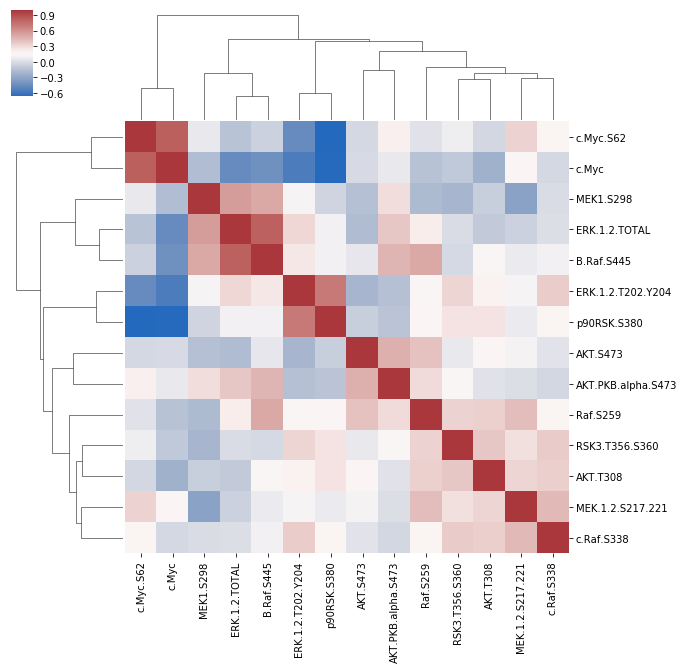

In [221]:
dims = (10, 10)
sns_core = sns.clustermap(to_plot_core, figsize=dims, cmap="vlag")
sns_core.savefig("richard_core_kvm_only.png")

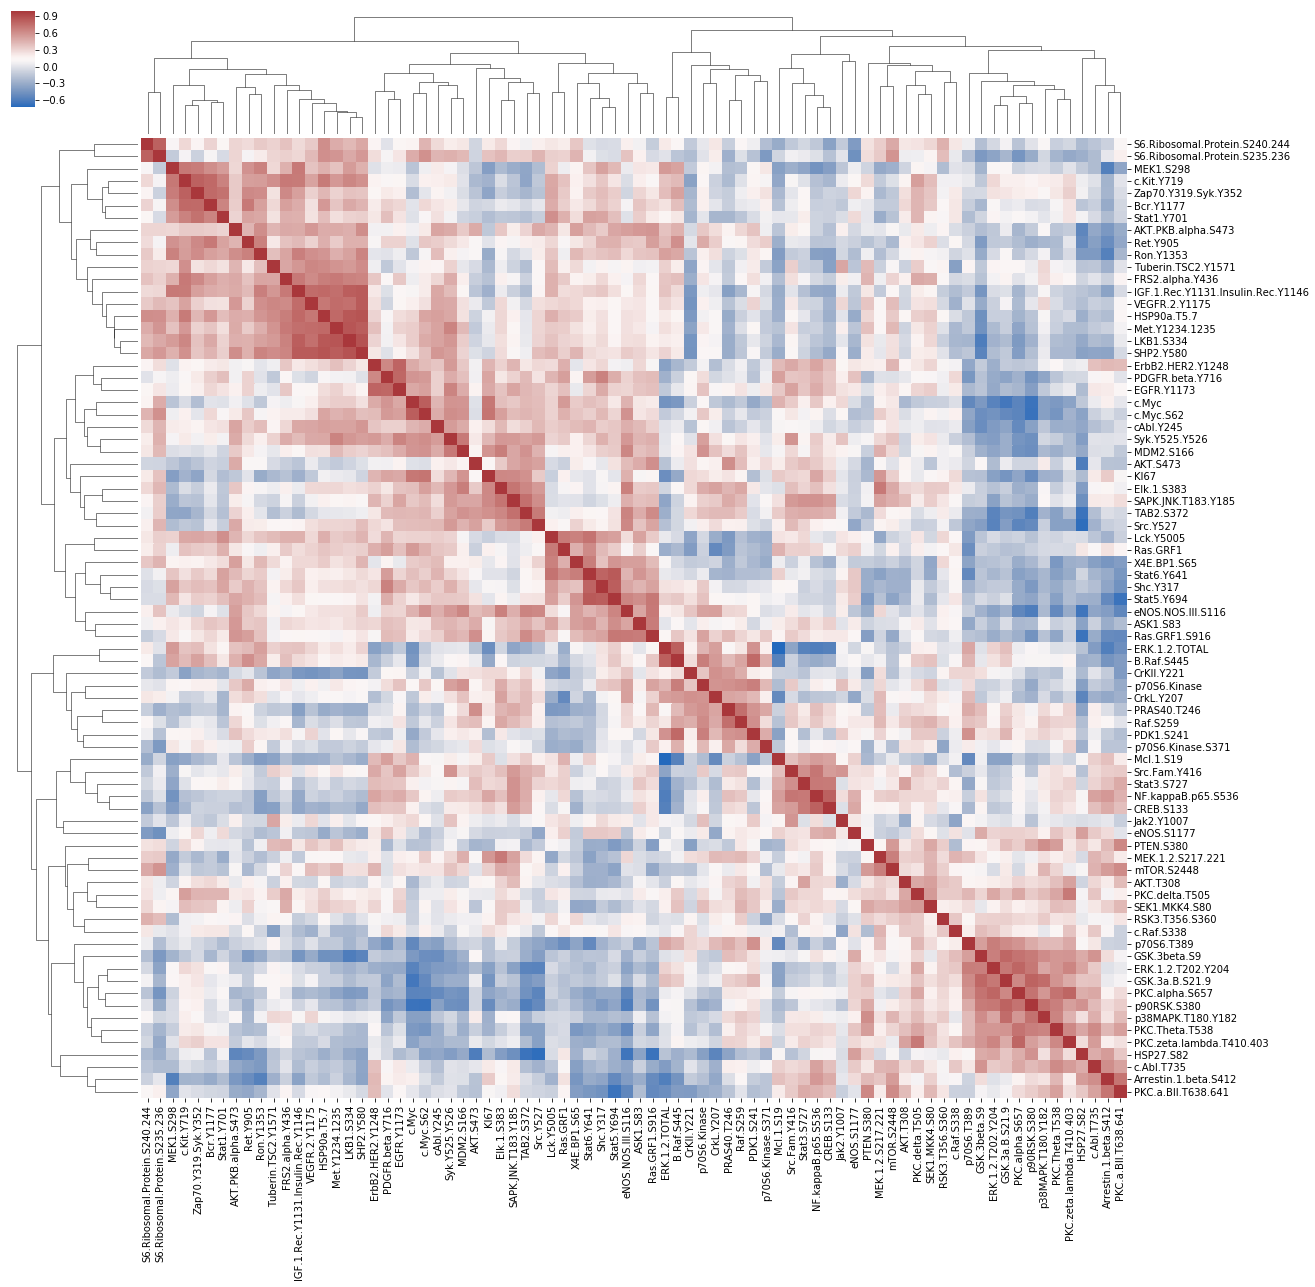

In [222]:
dims = (20, 20)
sns_mapk = sns.clustermap(to_plot_mapk, figsize=dims, cmap="vlag")
sns_mapk.savefig("richard_mapk_kvm_only.png")

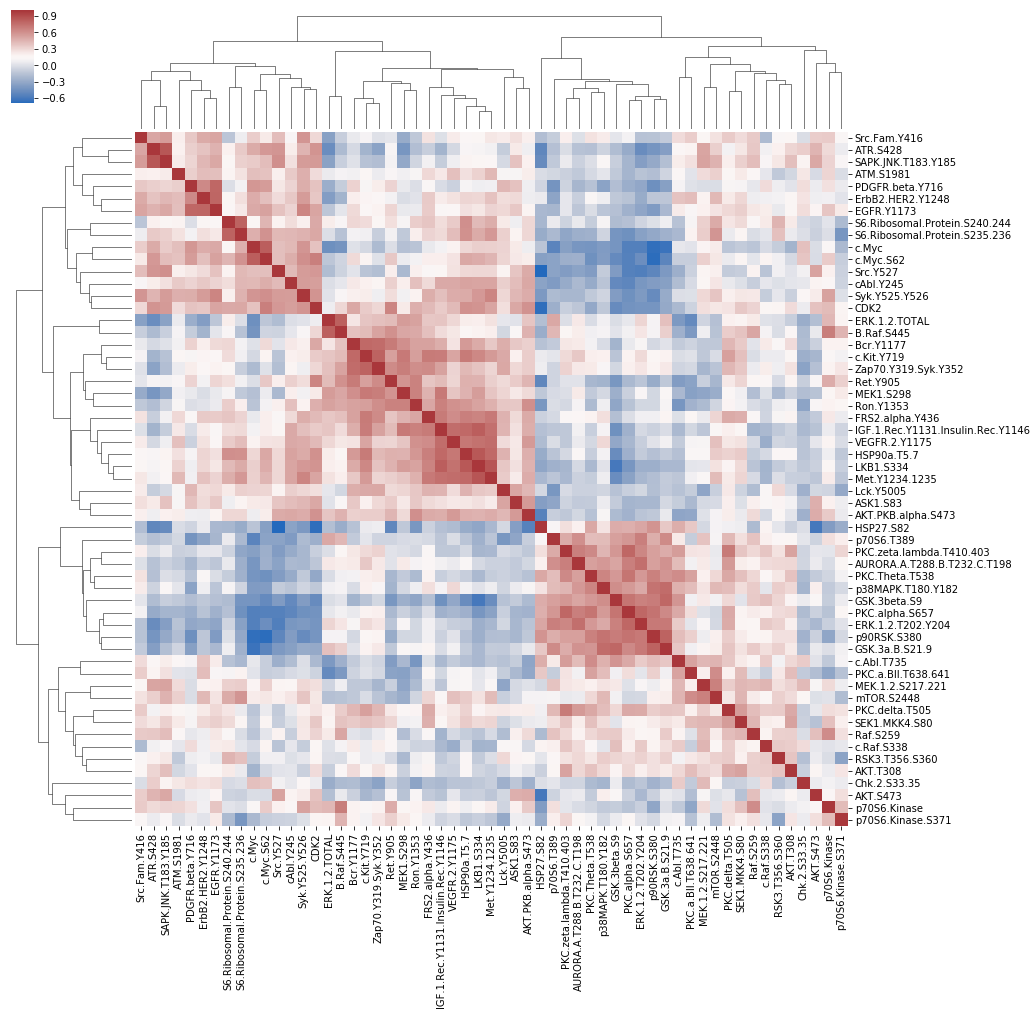

In [223]:
dims = (15, 15)
sns_rtk = sns.clustermap(to_plot_RTK, figsize=dims, cmap="vlag")
sns_rtk.savefig("richard_rtk_kvm_only.png")

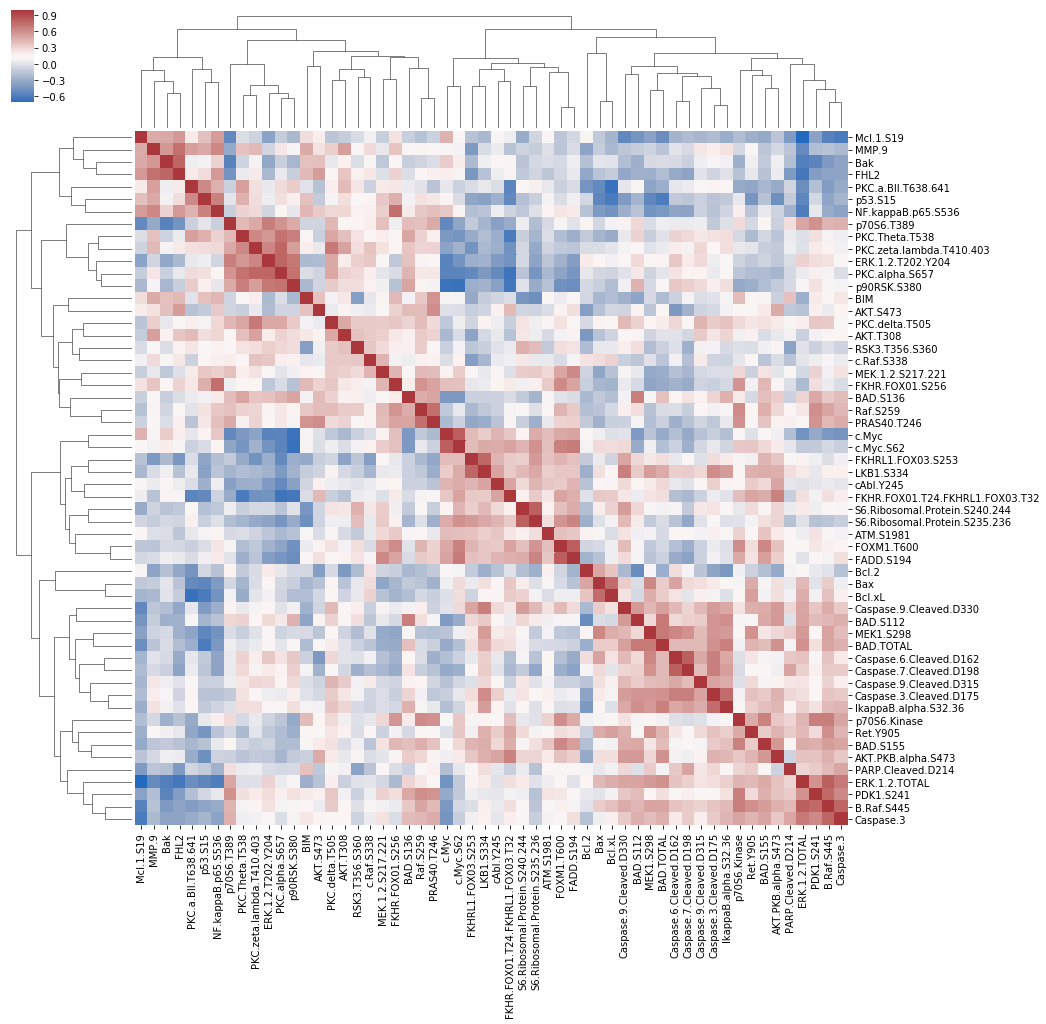

In [224]:
dims = (15, 15)
sns_apoptosis = sns.clustermap(to_plot_apoptosis, figsize=dims, cmap="vlag")
sns_apoptosis.savefig("richard_apoptosis_kvm_only.png")

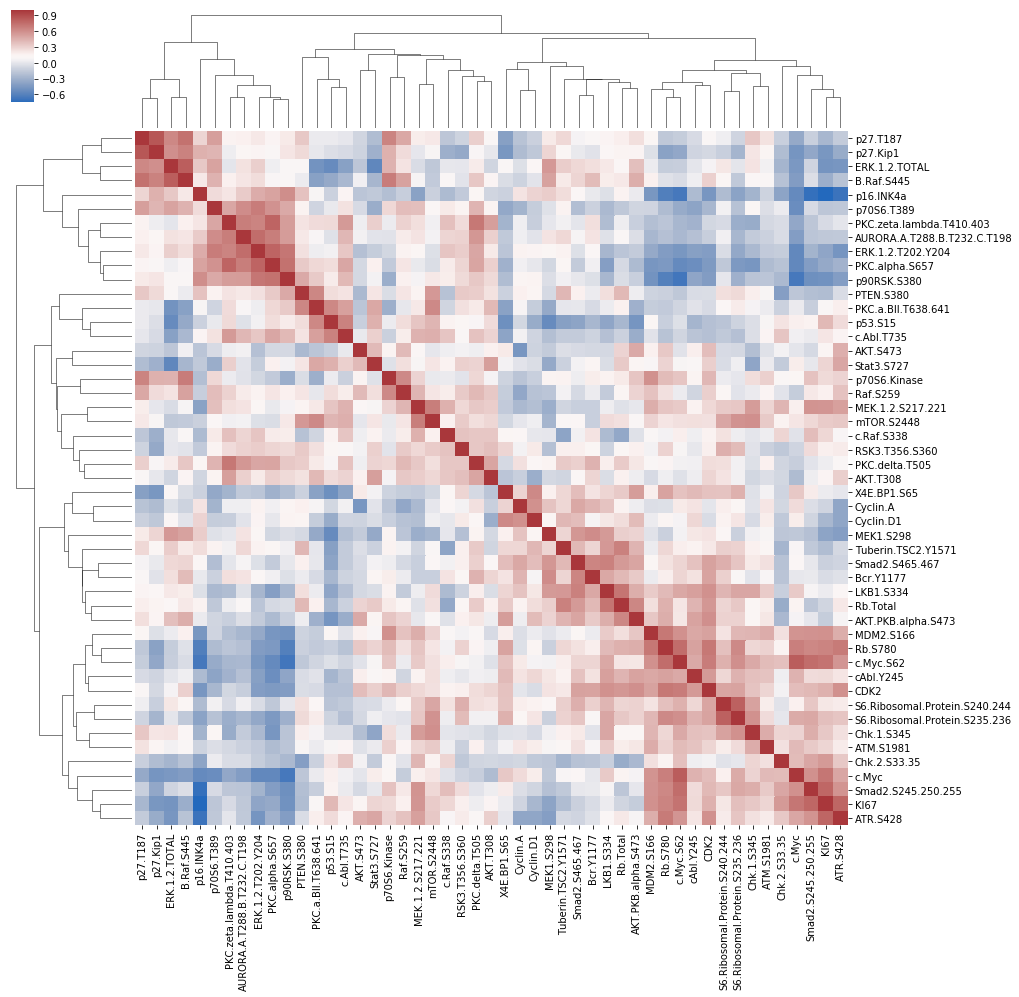

In [225]:
dims = (15, 15)
sns_cell = sns.clustermap(to_plot_cell, figsize=dims, cmap="vlag")
sns_cell.savefig("richard_cell_kvm_only.png")

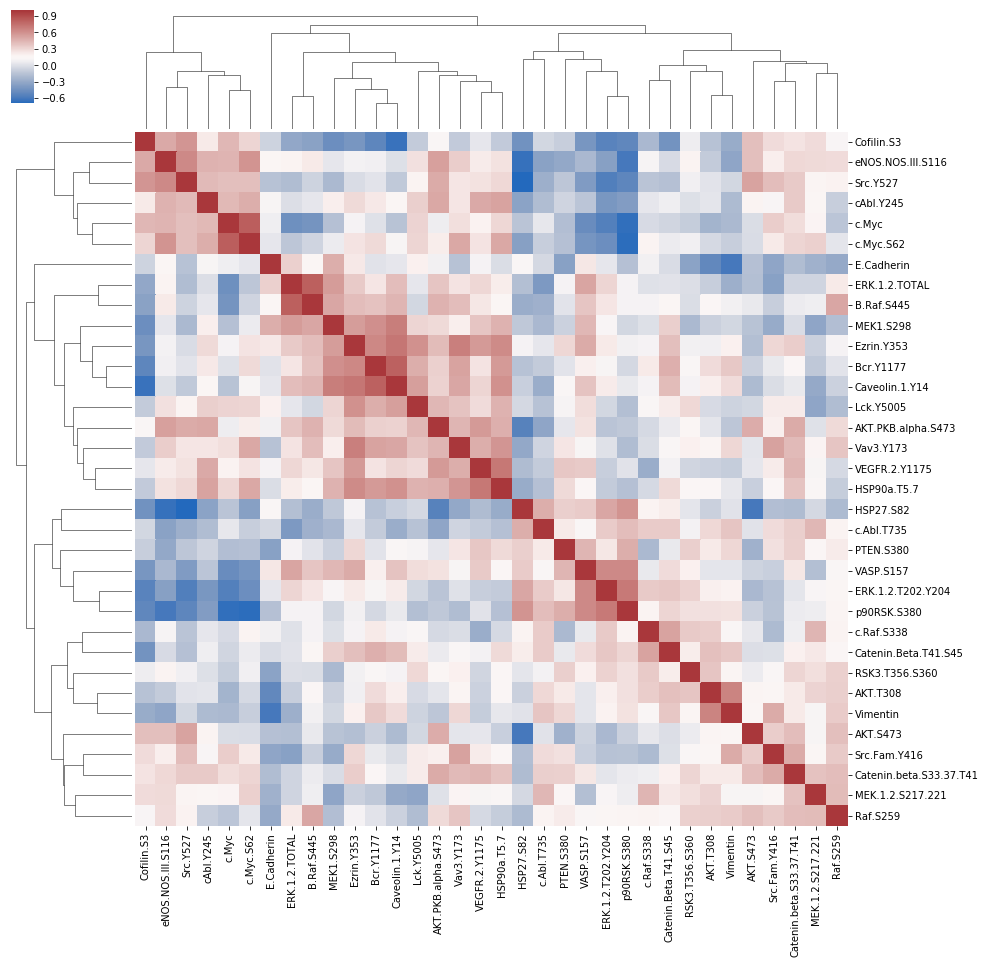

In [226]:
dims = (15, 15)
sns_cyto = sns.clustermap(to_plot_cytoskeleton, figsize=dims, cmap="vlag")
sns_cyto.savefig("richard_cyto_kvm_only.png")

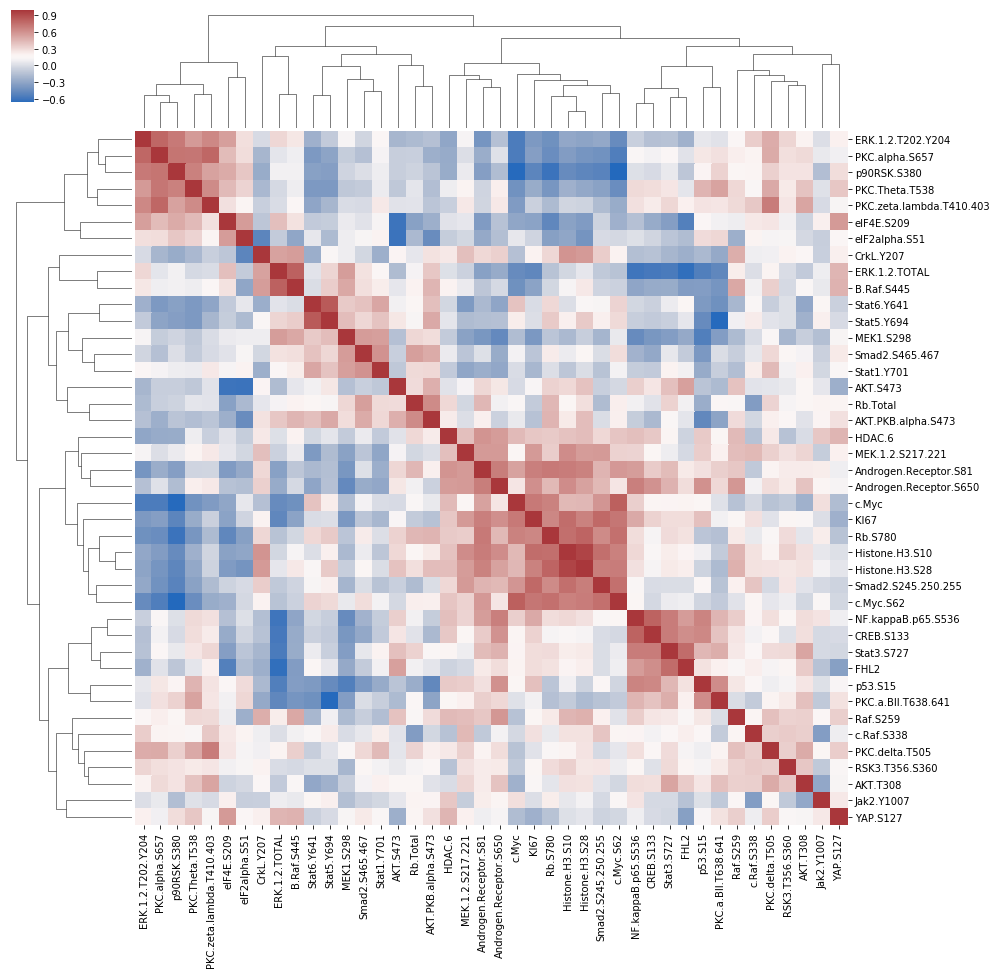

In [227]:
dims = (15, 15)
sns_dna = sns.clustermap(to_plot_dna, figsize=dims, cmap="vlag")
sns_dna.savefig("richard_dna_kvm_only.png")

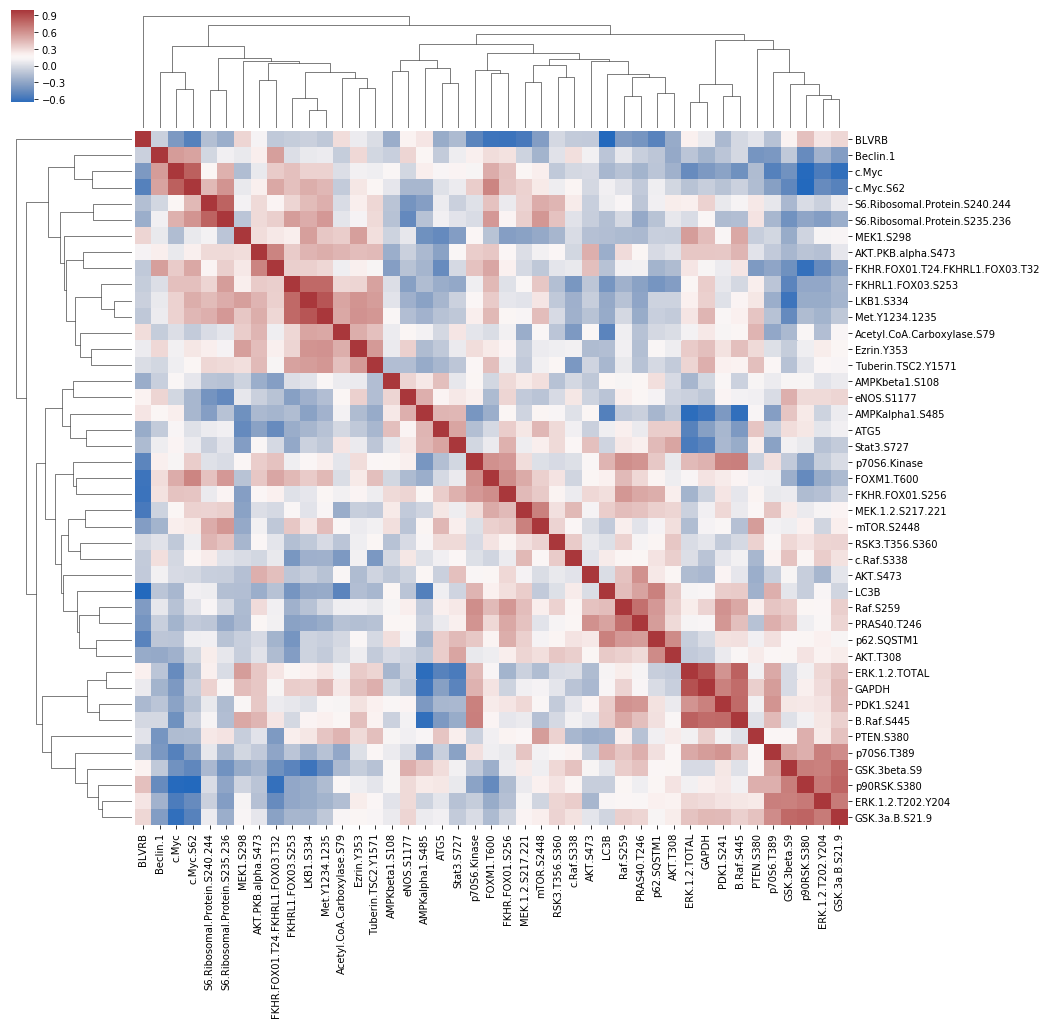

In [228]:
dims = (15, 15)
sns_meta = sns.clustermap(to_plot_metabolism, figsize=dims, cmap="vlag")
sns_meta.savefig("richard_meta_kvm_only.png")

In [ ]:
raw_data_subsets

In [ ]:
dims = (100, 60)
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(corr_matrix_spear, ax=ax, cmap=pls)

In [ ]:
corr_matrix_spear.keys()

In [ ]:
corr_matrix_spear["c-Myc "].sort_values(ascending=False)

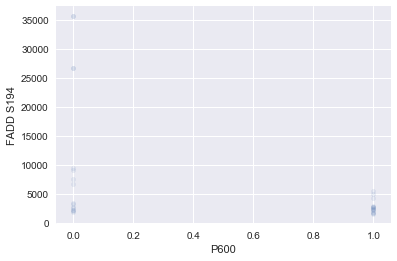

In [84]:
cleaned_data.plot(kind="scatter", x="P600", y="FADD S194", alpha=0.1)

In [ ]:
cleaned_data.plot(kind="scatter", x="c-Myc ", y="BAD S136 ", alpha=0.1)

In [ ]:
cleaned_data.plot(kind="scatter", x="c-Myc ", y="A-Raf S299", alpha=0.1)